# Introduction to Neural Networks Regression with TensorFlow

What is Neural Network?
Neural Network is a machine learning algorithm that is inspired by the way biological neural networks in the human brain process information. The neural network itself adjusts the weights on each of the neurons automatically during training.

What is Regression?
Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

So what is Neural Network Regression?
Neural Network Regression is a supervised learning algorithm that is used when the target variable is continuous and nature of the task is regression. In this algorithm, we have a set of inputs (x) and a set of outputs (Y). We train our model on a training dataset(x,y) to get an optimal value for the weights. Using these set of weights, we are able to predict for any new input data.


## Import libraries

In [9]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# check all the versions
print(tf.__version__)
print(np.__version__)
print(pd.__version__)


2.12.0
1.23.5
1.5.3


## Create data to view and fit

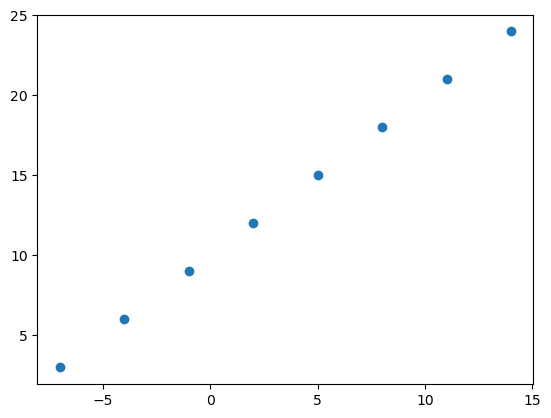

In [10]:
# create a dataset

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [11]:
# Figure out the relationship between X and y

# we can see that y = X + 10

# check the relationship between X and y
y == X + 10




array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes

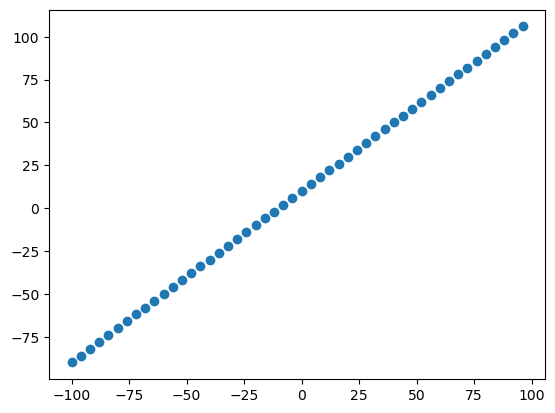

In [12]:
# create a demo tensor for house price prediction

# create features
X = tf.constant(tf.range(-100, 100, 4))
# create labels
y = tf.constant(tf.range(-90, 110, 4))

# visualize the data
plt.scatter(X, y)
